In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
telco = pd.read_csv("telco-customer-churn.csv")

## Prep the data so that it can be fed to a model.

In [3]:
telco.shape

(7043, 21)

In [4]:
len(telco["customerID"].unique())

7043

In [5]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Look for missing, null, NaN records.

In [7]:
print(telco.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [8]:
mask = False
for col in telco.columns:
    mask = mask | telco[col].isnull()
telco_nulls = telco[mask]
print(telco_nulls)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


### Transform data - all entries should be numeric.

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors = "coerce")
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
print(telco["TotalCharges"].isnull().any())

True


In [12]:
mask = False
for col in telco.columns:
    mask = mask | telco[col].isnull()
telco_nulls = telco[mask]
print(telco_nulls)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [13]:
# if tenure = 0 AND TotalCharges = NAN, make TotalCharges = MonthlyCharges
# (assuming they have not received their first bill yet)

t = telco.TotalCharges.fillna(telco.MonthlyCharges, inplace = True)
print(t)

None


In [14]:
print(telco["TotalCharges"].isnull().any())

False


In [15]:
print(telco.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [16]:
from sklearn.preprocessing import LabelEncoder

telco2 = telco.copy()

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = telco2.columns.values.tolist()
for col in features:
    if telco2[col].dtype in numerics: continue
    categorical_columns.append(col)

for col in categorical_columns:
    if col in telco2.columns:
        le = LabelEncoder()
        le.fit(list(telco2[col].astype(str).values))
        telco2[col] = le.transform(list(telco2[col].astype(str).values))
telco2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [17]:
# I originally converted all data to numerical values as seen below but took note from Dimitri Bouvier's
# presentation since he transformed his data in the above way, which is much simpler than my original approach

# telco["gender"].replace({"Male": 1, "Female":0}, inplace = True)
# telco["Partner"].replace({"Yes":1, "No":0}, inplace = True)
# telco["Dependents"].replace({"Yes":1, "No":0}, inplace = True)
# telco["PhoneService"].replace({"Yes":1, "No":0}, inplace = True)
# telco["MultipleLines"].replace({"Yes":2, "No":1, "No phone service":0}, inplace = True)
# telco["InternetService"].replace({"DSL":2, "Fiber optic":1, "No":0}, inplace = True)
# telco["OnlineSecurity"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["OnlineBackup"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["DeviceProtection"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["TechSupport"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["StreamingTV"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["StreamingMovies"].replace({"Yes":2, "No":1, "No internet service":0}, inplace = True)
# telco["Contract"].replace({"Two years":2, "Two year":2, "One year":1, "Month-to-month":0}, inplace = True)
# telco["PaperlessBilling"].replace({"Yes":4, "No":3, "Two years":2, "One year":1, "Month-to-month":0}, inplace = True)
# telco["PaymentMethod"].replace({"Electronic check":3, "Mailed check":2, "Bank transfer (automatic)":1, "Credit card (automatic)":0}, inplace = True)
# telco["Churn"].replace({"Yes":1, "No":0}, inplace = True)
# print(telco)

In [18]:
telco[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


### Find outliers.

In [19]:
Q1 = telco[["tenure", "MonthlyCharges", "TotalCharges"]].quantile(0.25)
print(Q1)

tenure              9.00
MonthlyCharges     35.50
TotalCharges      398.55
Name: 0.25, dtype: float64


In [20]:
Q3 = telco[["tenure", "MonthlyCharges", "TotalCharges"]].quantile(0.75)
print(Q3)

tenure              55.00
MonthlyCharges      89.85
TotalCharges      3786.60
Name: 0.75, dtype: float64


In [21]:
IQR = Q3 - Q1
print(IQR)

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64


<Axes: xlabel='tenure'>

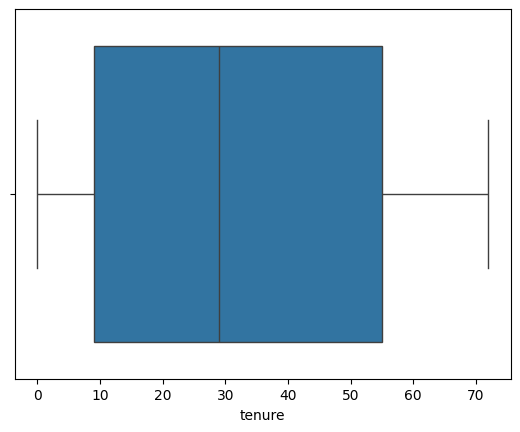

In [22]:
sns.boxplot(x = telco["tenure"])

<Axes: xlabel='MonthlyCharges'>

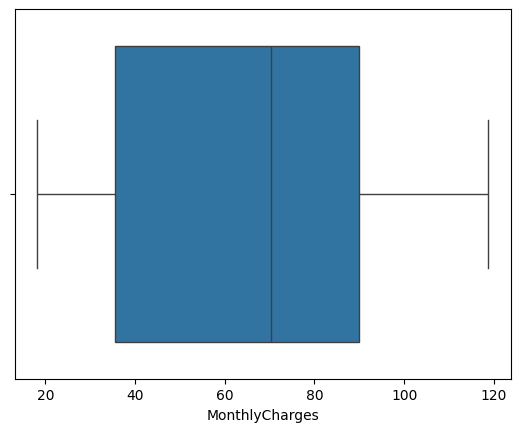

In [23]:
sns.boxplot(x = telco["MonthlyCharges"])

<Axes: xlabel='TotalCharges'>

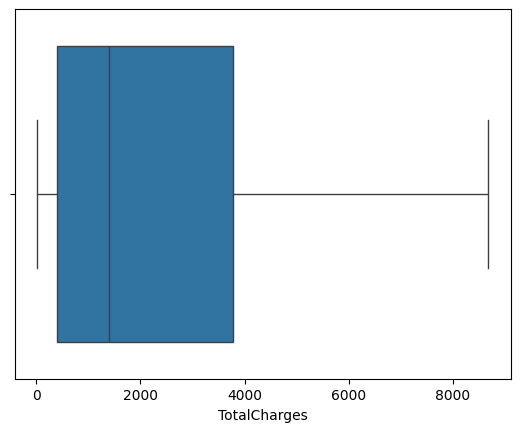

In [24]:
sns.boxplot(x = telco["TotalCharges"])

## List all types of data, numeric, categorical, text.

In [25]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Perform EDA on data.
### Present dependencies and correlations among the various features in the data.

In [26]:
telco[["tenure", "MonthlyCharges", "TotalCharges"]].corr(method = "pearson")

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826164
MonthlyCharges,0.247900,1.000000,0.651182
TotalCharges,0.826164,0.651182,1.000000


In [27]:
telco[["tenure", "MonthlyCharges", "TotalCharges"]].corr(method = "spearman")

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.276417,0.889653
MonthlyCharges,0.276417,1.000000,0.638211
TotalCharges,0.889653,0.638211,1.000000


In [28]:
telco[["tenure", "MonthlyCharges", "TotalCharges"]].corr(method = "kendall")

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.190565,0.734591
MonthlyCharges,0.190565,1.000000,0.460095
TotalCharges,0.734591,0.460095,1.000000


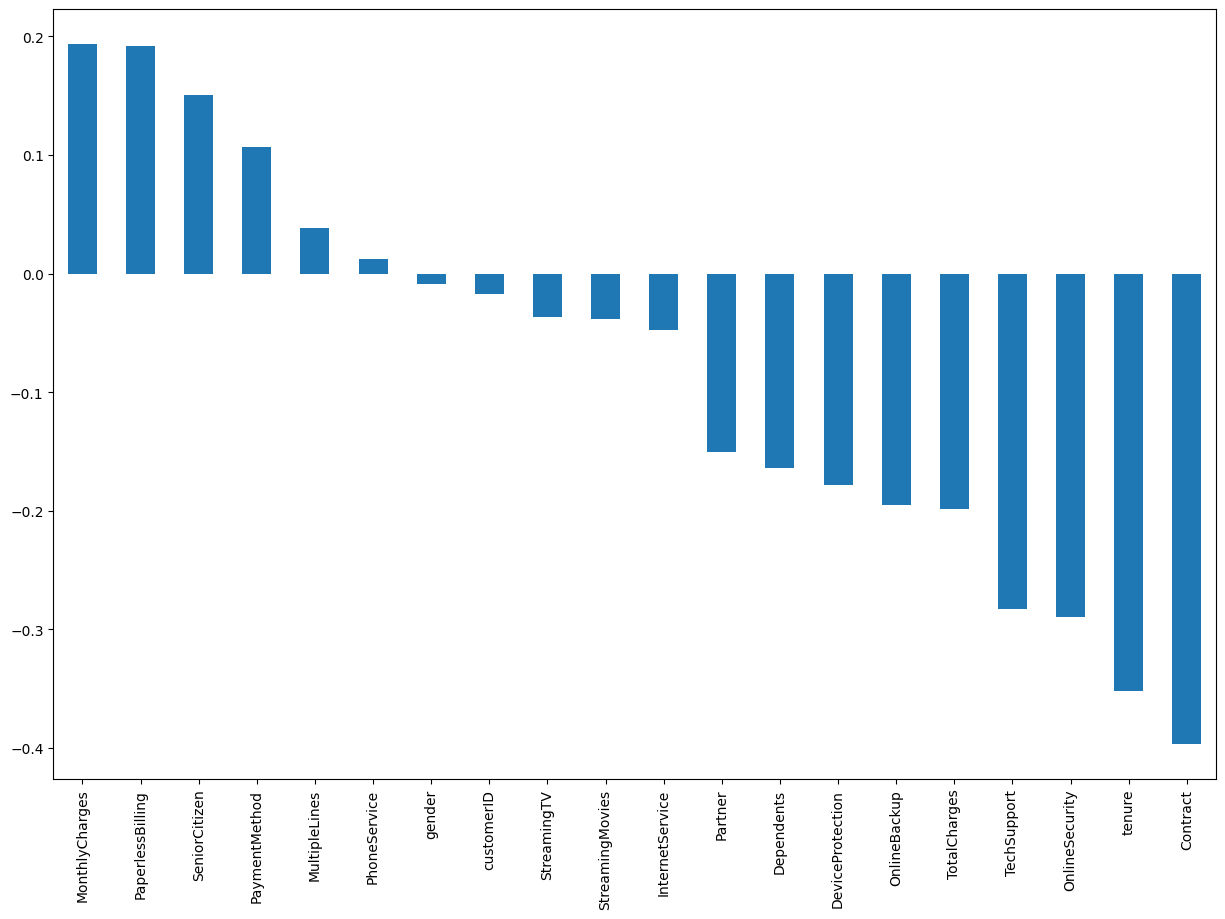

In [29]:
plt.figure(figsize = (15, 10))
telco2.corr()["Churn"].sort_values(ascending = False)[1:].plot(kind = "bar");

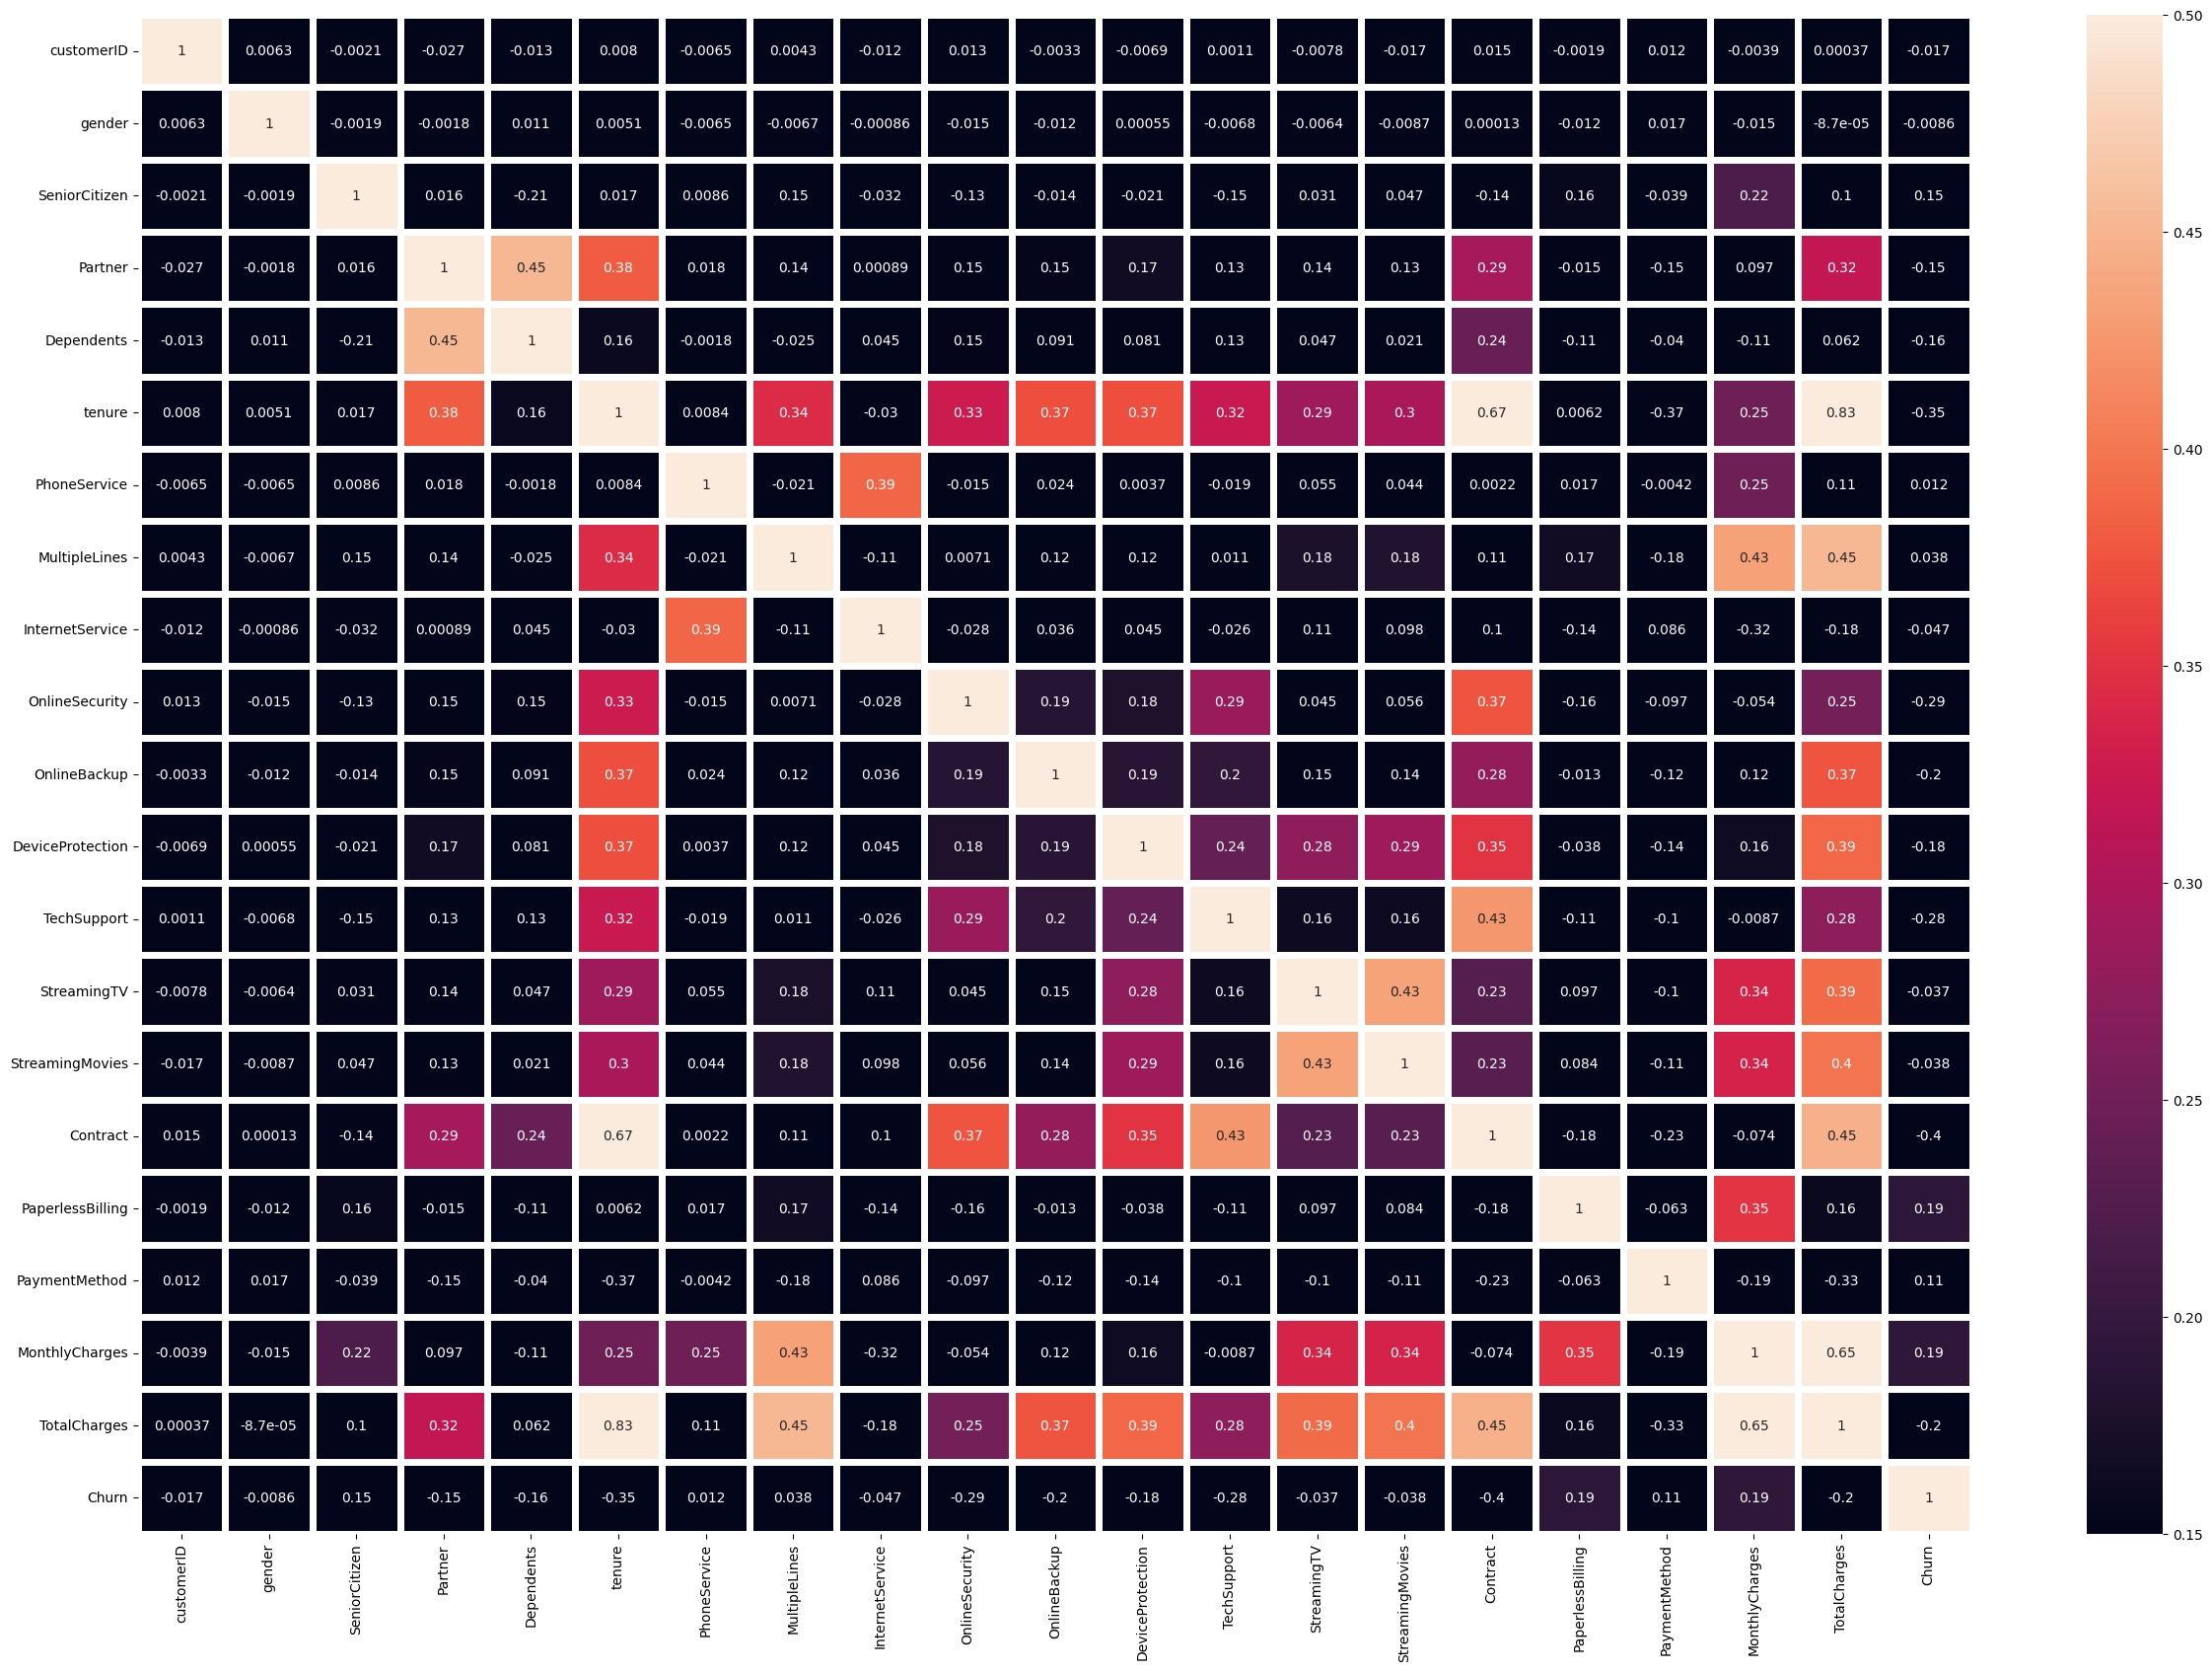

In [30]:
plt.figure(figsize = (30, 20))
sns.heatmap(telco2.corr(), linewidths = 5, vmin = 0.15, vmax = 0.5, annot = True)
plt.yticks(rotation = 0);

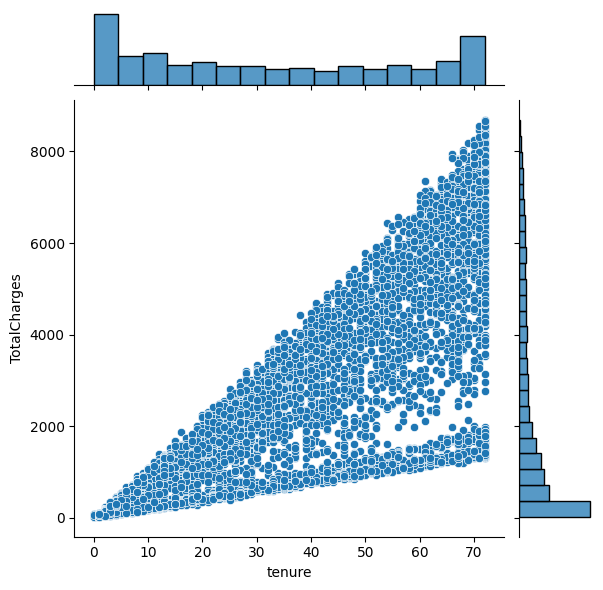

In [31]:
sns.jointplot(x = telco2["tenure"], y = telco["TotalCharges"])
plt.show()

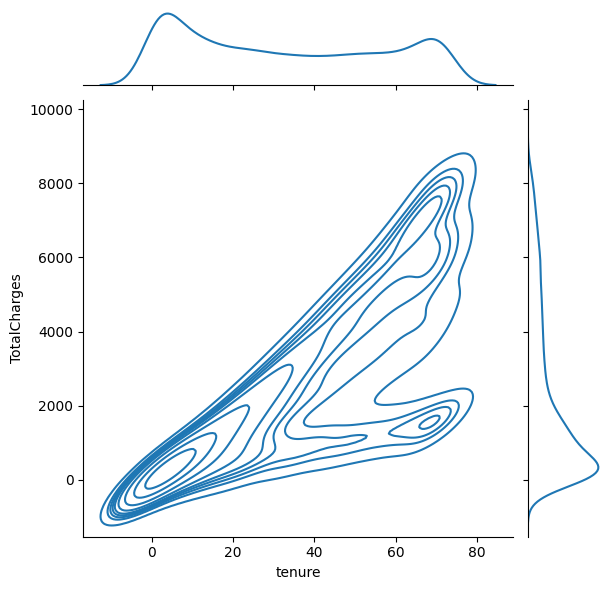

In [32]:
sns.jointplot(x = telco2["tenure"], y = telco["TotalCharges"], kind = "kde")
plt.show()

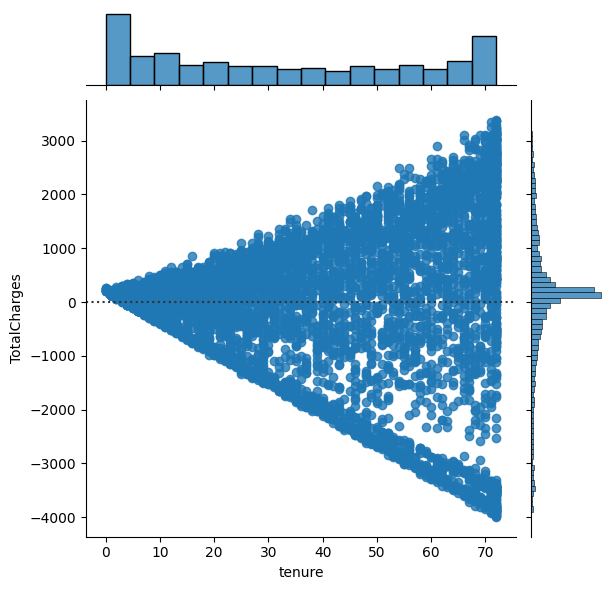

In [33]:
sns.jointplot(x = telco2["tenure"], y = telco["TotalCharges"], kind = "resid")
plt.show()

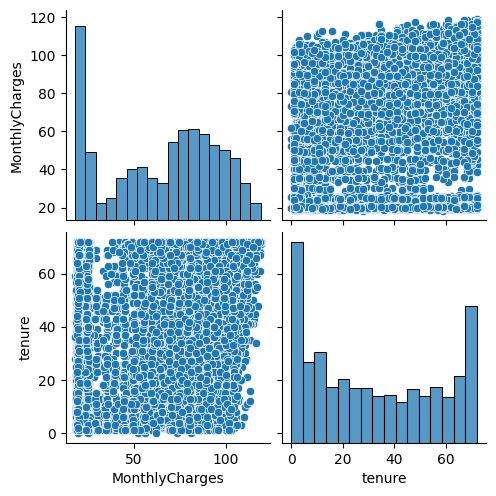

In [34]:
sns.pairplot(telco2[["MonthlyCharges", "tenure"]])

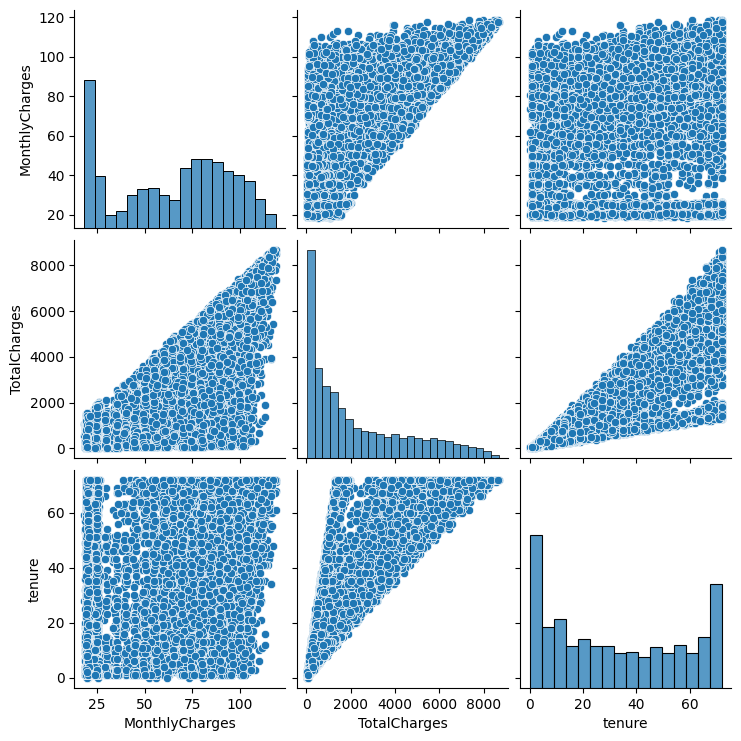

In [35]:
sns.pairplot(telco2[["MonthlyCharges", "TotalCharges", "tenure"]])

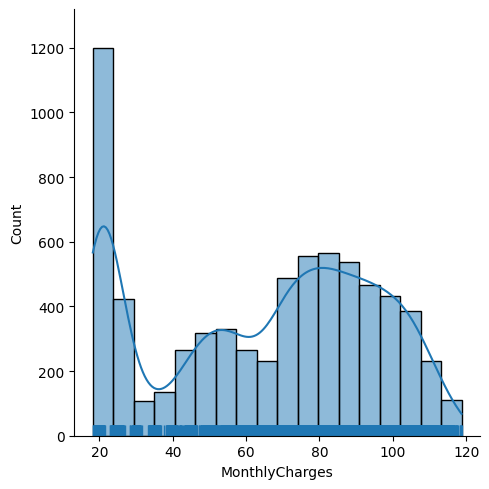

In [36]:
sns.displot(telco2["MonthlyCharges"], kde = True, rug = True)
plt.show()

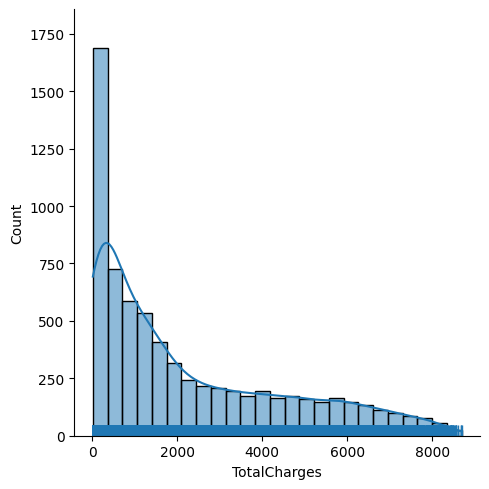

In [37]:
sns.displot(telco2["TotalCharges"], kde = True, rug = True)
plt.show()

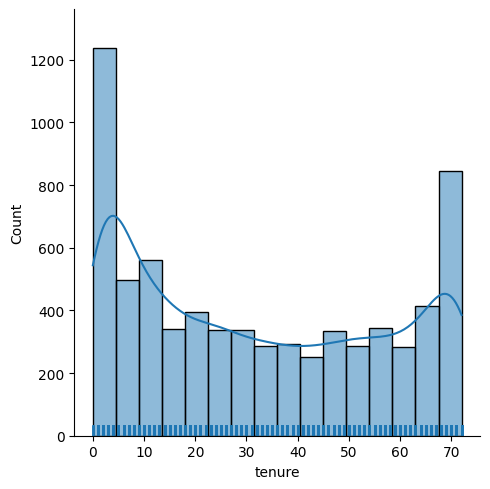

In [38]:
sns.displot(telco2["tenure"], kde = True, rug = True)
plt.show()

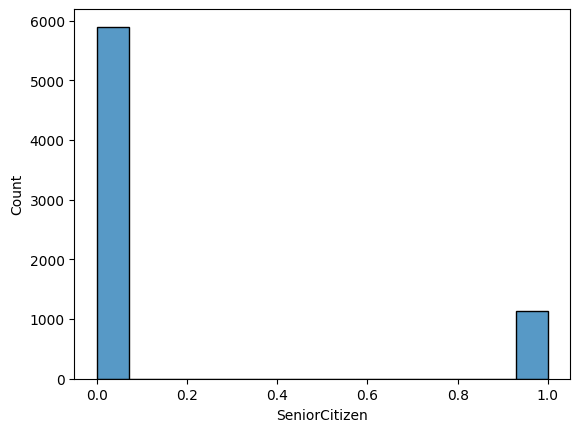

In [39]:
sns.histplot(telco2["SeniorCitizen"])
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='tenure'>

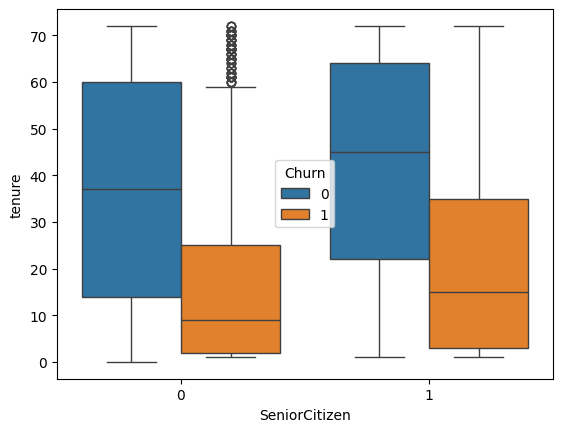

In [40]:
sns.boxplot(x = telco2["SeniorCitizen"], y = telco2["tenure"], hue = telco2["Churn"])
# SeniorCitizen: 0: Not Senior Citizen, 1: Senior Citizen
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='Contract'>

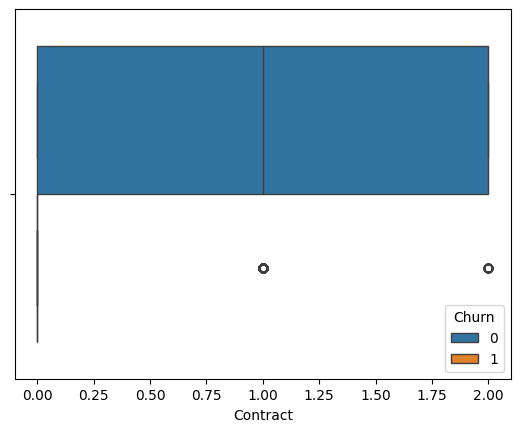

In [41]:
sns.boxplot(x = telco2["Contract"], hue = telco2["Churn"])
# Contract: 0: Month-to-Month, 1: One-Year, 2: Two-Years
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='SeniorCitizen', ylabel='PaymentMethod'>

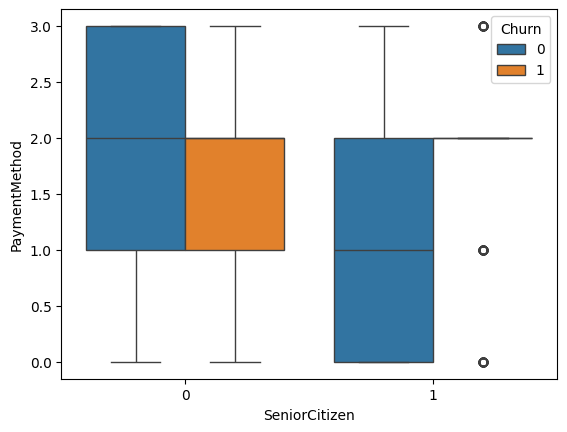

In [42]:
sns.boxplot(x = telco2["SeniorCitizen"], y = telco2["PaymentMethod"], hue = telco2["Churn"])
# SeniorCitizen: 0: Not Senior Citizen, 1: Senior Citizen
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='PaymentMethod', ylabel='tenure'>

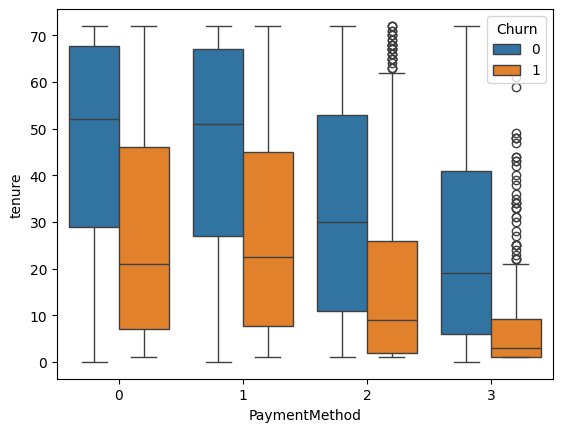

In [43]:
sns.boxplot(x = telco2["PaymentMethod"], y = telco2["tenure"], hue = telco2["Churn"])
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check
# Tenure: # of months the customer has stayed with the company
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='PaymentMethod', ylabel='tenure'>

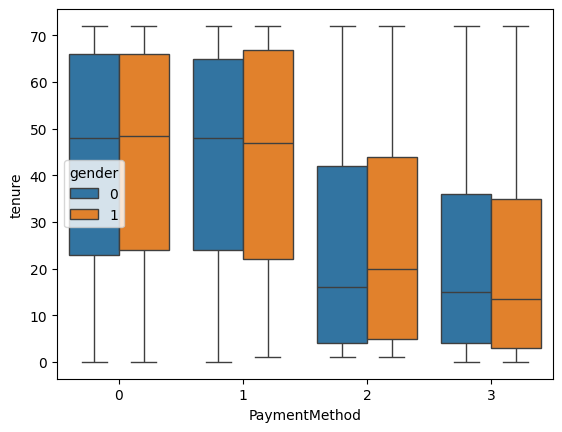

In [44]:
sns.boxplot(x = telco2["PaymentMethod"], y = telco2["tenure"], hue = telco2["gender"])
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check
# Tenure: # of months the customer has stayed with the company
# Gender: 0: Female, 1: Male

<Axes: xlabel='PaymentMethod', ylabel='count'>

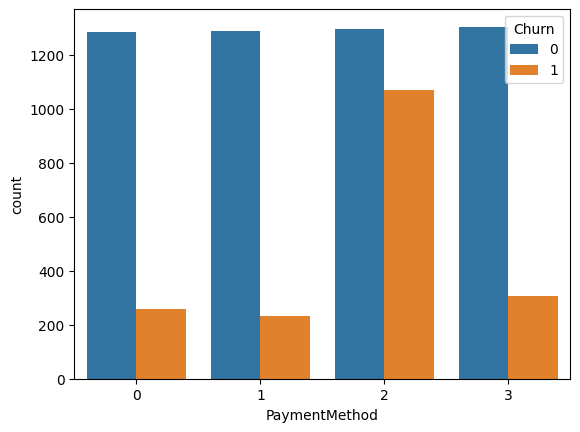

In [45]:
sns.countplot(x = telco2["PaymentMethod"], hue = telco2["Churn"])
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='gender', ylabel='count'>

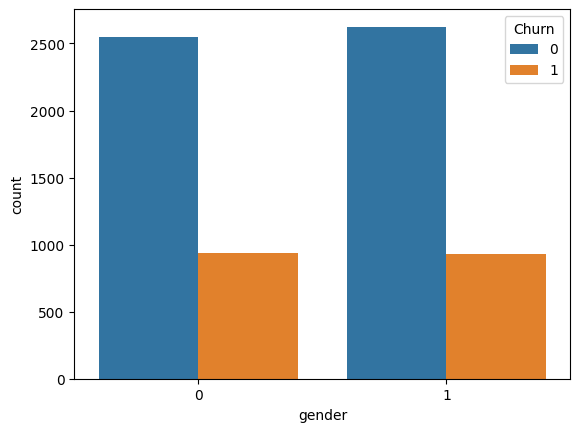

In [46]:
sns.countplot(x = telco2["gender"], hue = telco2["Churn"])
# Gender: 0: Female, 1: Male
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='Partner', ylabel='count'>

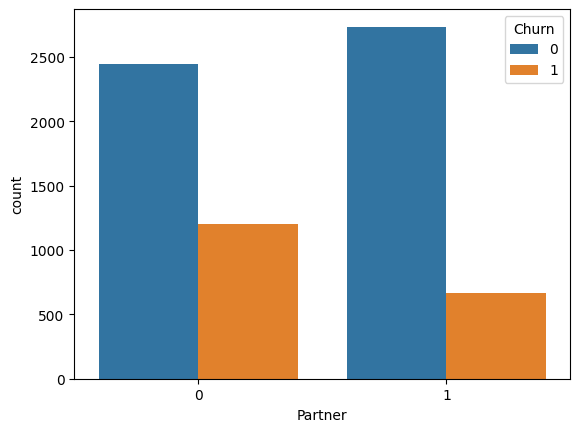

In [47]:
sns.countplot(x = telco2["Partner"], hue = telco2["Churn"])
# Partner: 0: No, 1: Yes
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='Dependents', ylabel='count'>

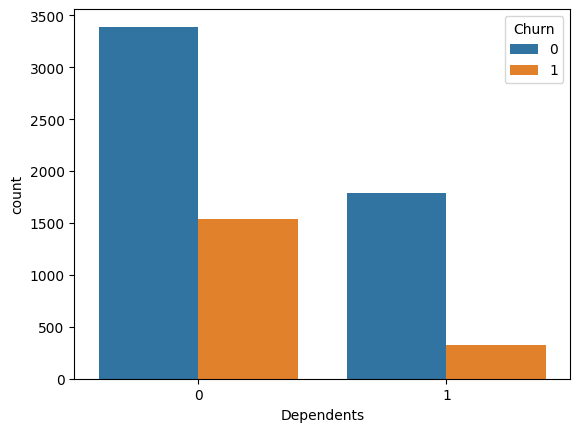

In [48]:
sns.countplot(x = telco2["Dependents"], hue = telco2["Churn"])
# Dependents: 0: No, 1 = Yes
# Churn: 0: Did Not Churned, 1: Churned

<Axes: xlabel='PaperlessBilling', ylabel='count'>

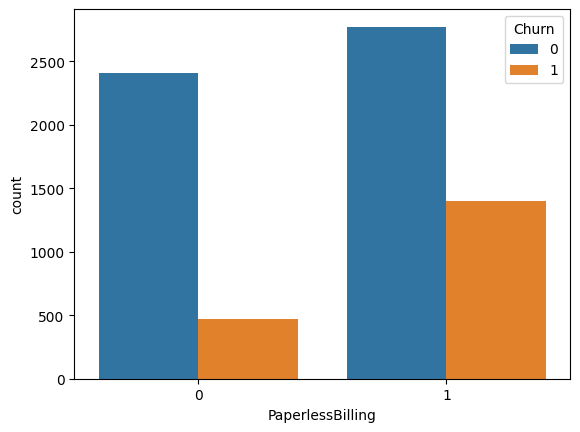

In [49]:
sns.countplot(x = telco2["PaperlessBilling"], hue = telco2["Churn"])

<Axes: xlabel='InternetService', ylabel='count'>

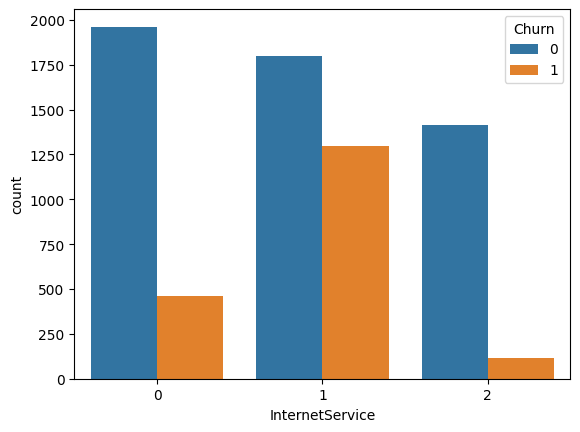

In [50]:
sns.countplot(x = telco2["InternetService"], hue = telco2["Churn"])
# 0 = None, 1 = Fiber optic, 2 = DSL

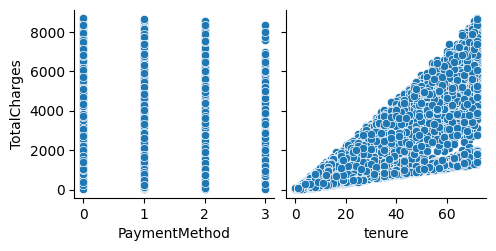

In [51]:
sns.pairplot(x_vars = ["PaymentMethod", "tenure"], y_vars = ["TotalCharges"], data = telco2)
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check

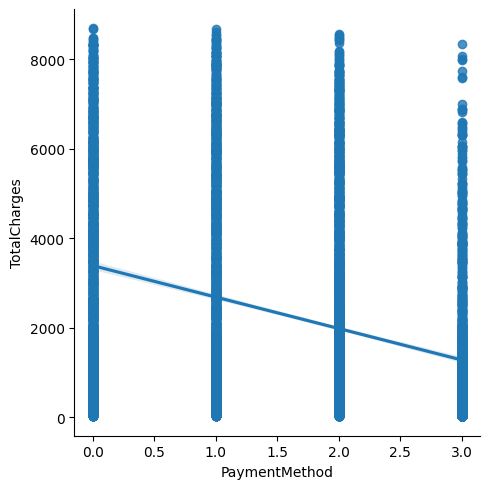

In [52]:
sns.lmplot(x = "PaymentMethod", y = "TotalCharges", data = telco2)
# Payment Method: 0 = Credit card (automatic), 1 = Bank transfer (automatic), 2 = Mailed check, 3: Electronic check

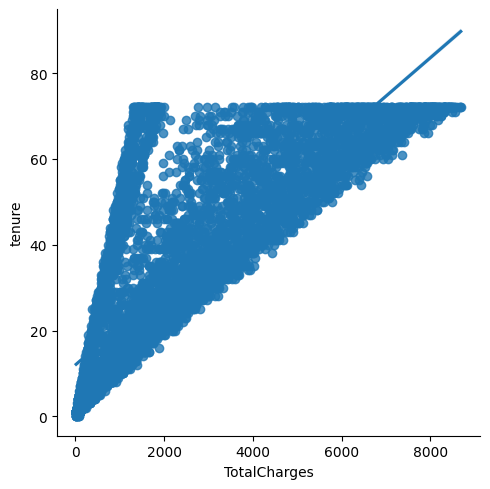

In [53]:
sns.lmplot(x = "TotalCharges", y = "tenure", data = telco2)

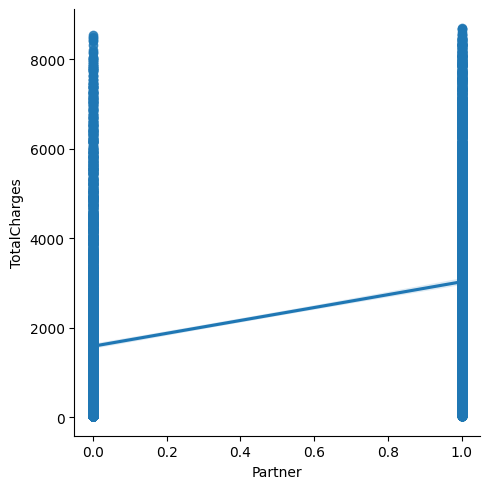

In [54]:
sns.lmplot(x = "Partner", y = "TotalCharges", data = telco2)
# Partner: 0: No, 1: Yes

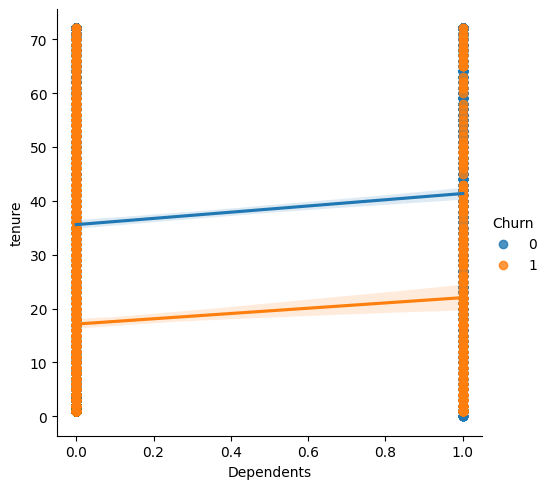

In [55]:
sns.lmplot(x = "Dependents", y = "tenure", hue = "Churn", data = telco2)
# Dependents: 0: No, 1 = Yes
# Partner: 0: No, 1: Yes
# Churn: 0: Did Not Churned, 1: Churned

## Split the dataset into training and test datasets (80/20 ratio).

In [56]:
X = telco2.drop(["Churn", "customerID"], axis = 1)
y = telco2["Churn"]

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(telco2, test_size = 0.20, random_state = 0)
print(train.shape)
print(test.shape)

(5634, 21)
(1409, 21)


### Using SweetViz's 'compare' command, contrast the training vs test datasets on the target ('churn').

In [58]:
import sweetviz as sv
sv.compare(train, test).show_html("Compare.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Preprocessing (Data Imputation, Feature Selection & Scaling, Encode Categorical Features): most of this was done in the previous sections of the code so they are not replicated below

In [59]:
X = telco2.iloc[:, : -1].values
y = telco2.iloc[:, -1].values

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [61]:
print(X.shape)
print(train.shape)
print(test.shape)
print(y.shape)

(7043, 20)
(5634, 21)
(1409, 21)
(7043,)


In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = SelectKBest(chi2, k=5).fit_transform(X, y)
X.shape

(7043, 5)

In [63]:
X

array([[5.3750e+03, 1.0000e+00, 0.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.9620e+03, 3.4000e+01, 1.0000e+00, 5.6950e+01, 1.8895e+03],
       [2.5640e+03, 2.0000e+00, 0.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [3.3670e+03, 1.1000e+01, 0.0000e+00, 2.9600e+01, 3.4645e+02],
       [5.9340e+03, 4.0000e+00, 0.0000e+00, 7.4400e+01, 3.0660e+02],
       [2.2260e+03, 6.6000e+01, 2.0000e+00, 1.0565e+02, 6.8445e+03]])

In [64]:
X = scaler.fit_transform(X)
X.shape

(7043, 5)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape)

(5634, 5)


## Fit your models on the original (given) dataset.
Build each of the models independently, by taking default parameters

### Naïve Bayes (NB)

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Logisitic Regression (LR)

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Random Forest (RF)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### XGBoost (XGB)

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Present the accuracy of each model; list the best one (in terms of Z‘recall’ metric)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

### Accuracy, Precision, F1-Score, Recall (huge emphasis on recall)

### Naïve Bayes (NB)

In [71]:
gnb_y_pred = gnb.predict(X_test)

In [72]:
print("Gaussian Naïve Bayes \nConfusion Matrix: \n", confusion_matrix(y_test, gnb_y_pred))

Gaussian Naïve Bayes 
Confusion Matrix: 
 [[690 351]
 [ 91 277]]


In [73]:
gnb_recall = (690 / (690 + 351))
print(gnb_recall)

0.6628242074927954


Gaussian Naïve Bayes Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


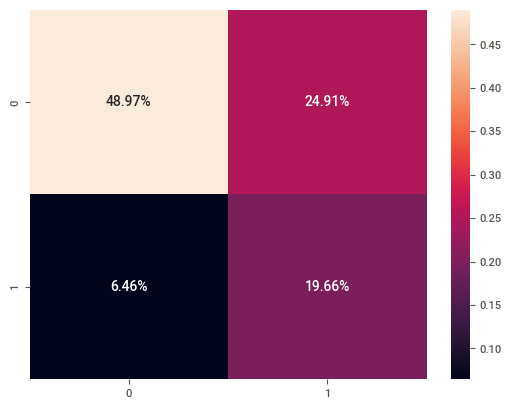

In [74]:
gnb_cm = (confusion_matrix(y_test, gnb_y_pred) / confusion_matrix(y_test, gnb_y_pred).astype(float).sum()) * 100
print("Gaussian Naïve Bayes Confusion Matrix: \n")
print(sns.heatmap(gnb_cm/nm.sum(gnb_cm), annot = True, fmt = ".2%"))

In [75]:
print("Gaussian Naïve Bayes \nClassification Report: \n", classification_report(y_test, gnb_y_pred))

Gaussian Naïve Bayes 
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.66      0.76      1041
           1       0.44      0.75      0.56       368

    accuracy                           0.69      1409
   macro avg       0.66      0.71      0.66      1409
weighted avg       0.77      0.69      0.70      1409



### Logisitic Regression (LR)

In [76]:
lr_y_pred = lr.predict(X_test)

In [77]:
print("Logistic Regression \nConfusion Matrix: \n", confusion_matrix(y_test, lr_y_pred))

Logistic Regression 
Confusion Matrix: 
 [[915 126]
 [203 165]]


In [78]:
lr_recall = (915 / (915 + 126))
print(lr_recall)

0.8789625360230547


Logistic Regression Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


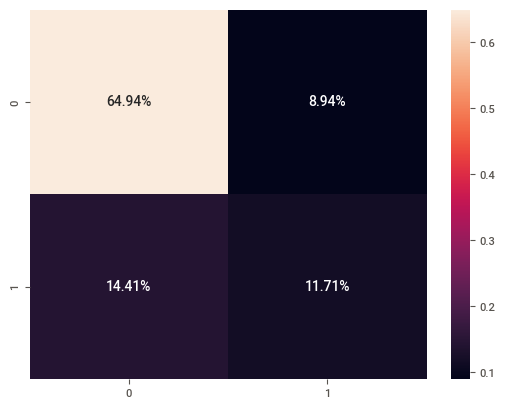

In [79]:
lr_cm = (confusion_matrix(y_test, lr_y_pred) / confusion_matrix(y_test, lr_y_pred).astype(float).sum()) * 100
print("Logistic Regression Confusion Matrix: \n")
print(sns.heatmap(lr_cm/nm.sum(lr_cm), annot = True, fmt = ".2%"))

In [80]:
print("Logistic Regression \nClassification Report: \n", classification_report(y_test, lr_y_pred))

Logistic Regression 
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.57      0.45      0.50       368

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409



### Random Forests (RF)

In [81]:
rf_y_pred = rf.predict(X_test)

In [82]:
print("Random Forest \nConfusion Matrix: \n", confusion_matrix(y_test, rf_y_pred))

Random Forest 
Confusion Matrix: 
 [[905 136]
 [199 169]]


In [83]:
rf_recall = (913 / (913 + 128))
print(rf_recall)

0.8770413064361191


Random Forest Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


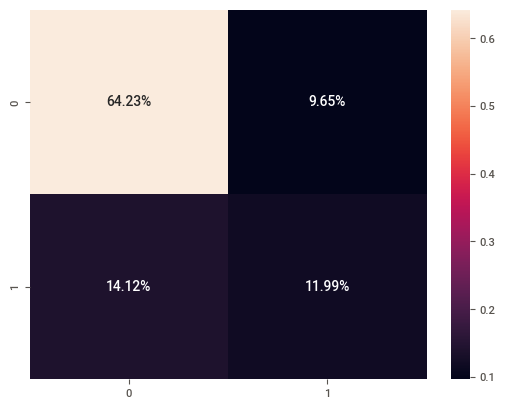

In [84]:
rf_cm = (confusion_matrix(y_test, rf_y_pred) / confusion_matrix(y_test, rf_y_pred).astype(float).sum()) * 100
print("Random Forest Confusion Matrix: \n")
print(sns.heatmap(rf_cm/nm.sum(rf_cm), annot = True, fmt = ".2%"))

In [85]:
print("Random Forest \nClassification Report: \n", classification_report(y_test, rf_y_pred))

Random Forest 
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1041
           1       0.55      0.46      0.50       368

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



### XGBoost (XGB)

In [86]:
xgb_y_pred = xgb.predict(X_test)

In [87]:
print("XGBoost \nConfusion Matrix: \n", confusion_matrix(y_test, xgb_y_pred))

XGBoost 
Confusion Matrix: 
 [[911 130]
 [191 177]]


In [88]:
xgb_recall = (912 / (912 + 129))
print(xgb_recall)

0.8760806916426513


XGBoost Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


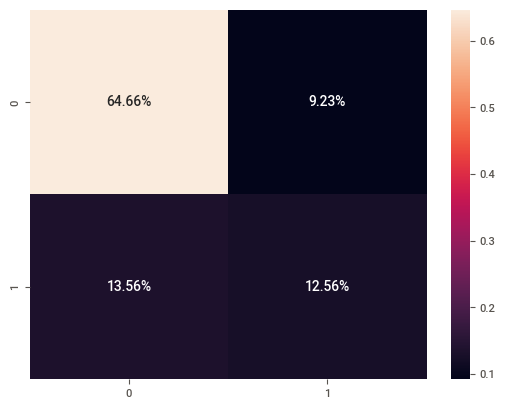

In [89]:
xgb_cm = (confusion_matrix(y_test, xgb_y_pred) / confusion_matrix(y_test, xgb_y_pred).astype(float).sum()) * 100
print("XGBoost Confusion Matrix: \n")
print(sns.heatmap(xgb_cm/nm.sum(xgb_cm), annot = True, fmt = ".2%"))

In [90]:
print("XGBoost \nClassification Report: \n", classification_report(y_test, xgb_y_pred))

XGBoost 
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.48      0.52       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



## Tune (hyperparameter tuning) only the Random Forest and XGBoost Models

### Random Forests (RF)

In [91]:
rf1 = RandomForestClassifier(n_estimators = 300, max_leaf_nodes = 10)
rf1.fit(X_train, y_train)
rf1_y_pred = rf1.predict(X_test)

In [92]:
print("Feature Importance of Random Forest Classifier with Parameters: \n")
for name, score in zip(telco2, rf1.feature_importances_):
    print(name, score)

Feature Importance of Random Forest Classifier with Parameters: 

customerID 0.003731670328803748
gender 0.2794686268977126
SeniorCitizen 0.3740807041636231
Partner 0.21855878197120368
Dependents 0.12416021663865695


In [93]:
print("Random Forest \nConfusion Matrix: \n", confusion_matrix(y_test, rf1_y_pred))

Random Forest 
Confusion Matrix: 
 [[946  95]
 [211 157]]


Tuned Random Forest Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


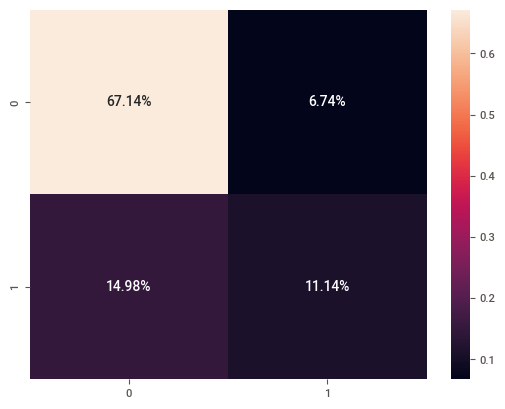

In [94]:
rf1_cm = (confusion_matrix(y_test, rf1_y_pred) / confusion_matrix(y_test, rf1_y_pred).astype(float).sum()) * 100
print("Tuned Random Forest Confusion Matrix: \n")
print(sns.heatmap(rf1_cm/nm.sum(rf1_cm), annot = True, fmt = ".2%"))

In [95]:
print("Random Forest \nClassification Matrix: \n", classification_report(y_test, rf1_y_pred))

Random Forest 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1041
           1       0.62      0.43      0.51       368

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.77      0.78      0.77      1409



### XGBoost (XGB)

In [96]:
xgb1 = XGBClassifier(n_estimators = 300, max_leaf_nodes = 10)

In [97]:
xgb1.fit(X_train, y_train)
xgb1_y_pred = xgb1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:36:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [98]:
print("Feature Importance of XGBoost Classifier with Parameters: \n")
for name, score in zip(telco2, xgb1.feature_importances_):
    print(name, score)

Feature Importance of XGBoost Classifier with Parameters: 

customerID 0.038786873
gender 0.0624585
SeniorCitizen 0.8028369
Partner 0.053780206
Dependents 0.04213753


In [99]:
print("XGBoost \nConfusion Matrix: \n", confusion_matrix(y_test, xgb1_y_pred))

XGBoost 
Confusion Matrix: 
 [[907 134]
 [198 170]]


Tuned XGBoost Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


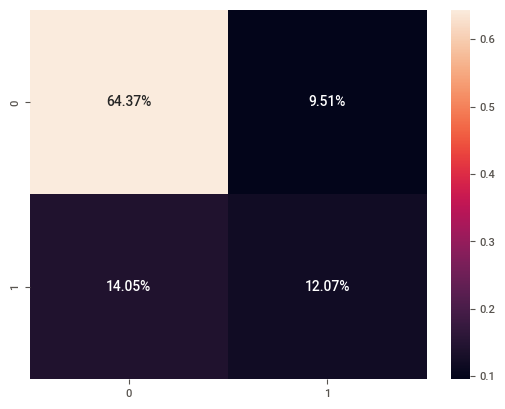

In [100]:
xgb1_cm = (confusion_matrix(y_test, xgb1_y_pred) / confusion_matrix(y_test, xgb1_y_pred).astype(float).sum()) * 100
print("Tuned XGBoost Confusion Matrix: \n")
print(sns.heatmap(xgb1_cm/nm.sum(xgb1_cm), annot = True, fmt = ".2%"))

In [101]:
print("XGBoost \nClassification Matrix: \n", classification_report(y_test, xgb1_y_pred))

XGBoost 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1041
           1       0.56      0.46      0.51       368

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409



## Comparing results

NB 0.7961277445109781
LR 0.49965269461077844
RF 0.4969940119760479
XGB 0.5056713240186294
[array([0.792     , 0.788     , 0.80838323]), array([0.488     , 0.49      , 0.52095808]), array([0.486     , 0.496     , 0.50898204]), array([0.528     , 0.496     , 0.49301397])]


<ipython-input-102-e99e8b3530d6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


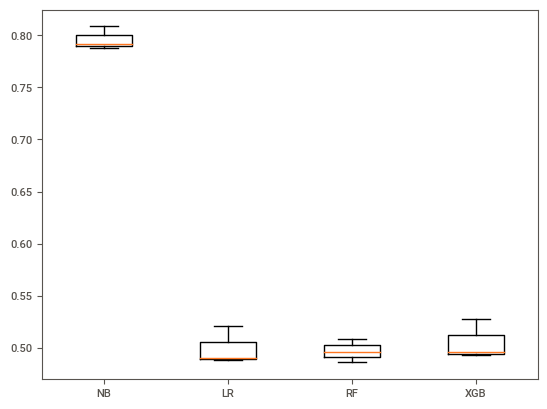

In [102]:
from sklearn.model_selection import cross_val_score

models = []

def classification_Models(X2_train, X2_test, y2_train, y2_test ):

    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

classification_Models(X_train, X_test, y_train, y_test)

## Fit your models on the modified dataset, after applying the SMOTE technique.

### Address Data Imbalance (apply SMOTE technique)

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_train, y_train = smote.fit_resample(X_train, y_train)

## Build each of the models independently, by taking default parameters

### Naïve Bayes (NB)

In [104]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Logisitic Regression (LR)

In [105]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Random Forests (RF)

In [106]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### XGBoost (XGB)

In [107]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Present the accuracy of each model; list the best one (in terms of ‘recall’ metric)

### Accuracy, Precision, F1-Score, Recall (Huge emphasis on recall)

### Naïve Bayes (NB)

In [108]:
gnb_y_pred = gnb.predict(X_test)

In [109]:
print("Gaussian Naïve Bayes \nConfusion Matrix: \n", confusion_matrix(y_test, gnb_y_pred))

Gaussian Naïve Bayes 
Confusion Matrix: 
 [[643 398]
 [ 73 295]]


In [110]:
gnb_recall = (643 / (643 + 398))
print(gnb_recall)

0.6176753121998079


Gaussian Naïve Bayes Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


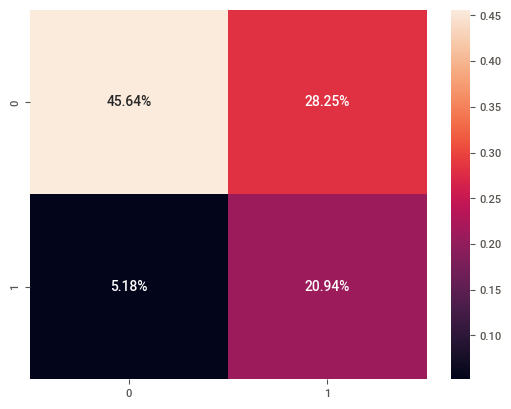

In [111]:
gnb_cm = (confusion_matrix(y_test, gnb_y_pred) / confusion_matrix(y_test, gnb_y_pred).astype(float).sum()) * 100
print("Gaussian Naïve Bayes Confusion Matrix: \n")
print(sns.heatmap(gnb_cm/nm.sum(gnb_cm), annot = True, fmt = ".2%"))

In [112]:
print("Gaussian Naïve Bayes \nClassification Report: \n", classification_report(y_test, gnb_y_pred))

Gaussian Naïve Bayes 
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.62      0.73      1041
           1       0.43      0.80      0.56       368

    accuracy                           0.67      1409
   macro avg       0.66      0.71      0.64      1409
weighted avg       0.77      0.67      0.69      1409



### Logisitic Regression (LR)

In [113]:
lr_y_pred = lr.predict(X_test)

In [114]:
print("Logistic Regression \nConfusion Matrix: \n", confusion_matrix(y_test, lr_y_pred))

Logistic Regression 
Confusion Matrix: 
 [[727 314]
 [ 77 291]]


In [115]:
lr_recall = (727 / (727 + 314))
print(lr_recall)

0.6983669548511047


Logistic Regression Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


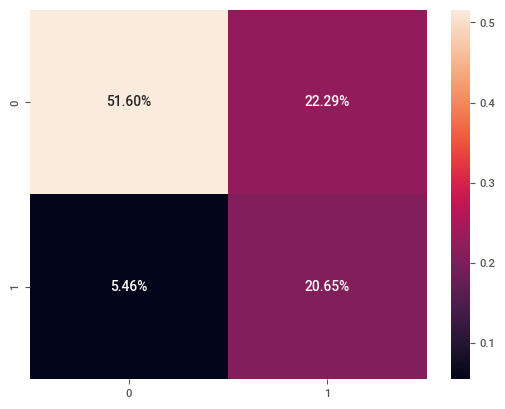

In [116]:
lr_cm = (confusion_matrix(y_test, lr_y_pred) / confusion_matrix(y_test, lr_y_pred).astype(float).sum()) * 100
print("Logistic Regression Confusion Matrix: \n")
print(sns.heatmap(lr_cm/nm.sum(lr_cm), annot = True, fmt = ".2%"))

In [117]:
print("Logistic Regression \nClassification Report: \n", classification_report(y_test, lr_y_pred))

Logistic Regression 
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1041
           1       0.48      0.79      0.60       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



### Random Forests (RF)

In [118]:
rf_y_pred = rf.predict(X_test)

In [119]:
print("Random Forest \nConfusion Matrix: \n", confusion_matrix(y_test, rf_y_pred))

Random Forest 
Confusion Matrix: 
 [[840 201]
 [161 207]]


In [120]:
rf_recall = (848 / (848 + 193))
print(rf_recall)

0.8146013448607109


Random Forest Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


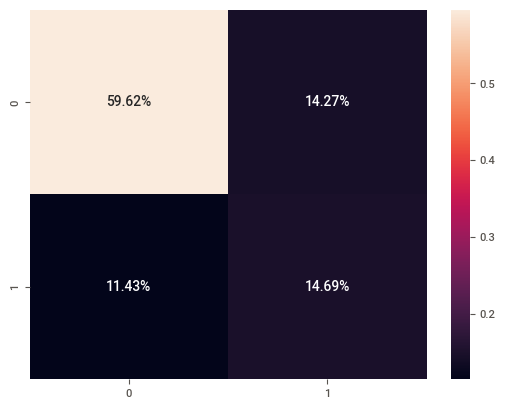

In [121]:
rf_cm = (confusion_matrix(y_test, rf_y_pred) / confusion_matrix(y_test, rf_y_pred).astype(float).sum()) * 100
print("Random Forest Confusion Matrix: \n")
print(sns.heatmap(rf_cm/nm.sum(rf_cm), annot = True, fmt = ".2%"))

In [122]:
print("Random Forest \nClassification Report: \n", classification_report(y_test, rf_y_pred))

Random Forest 
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1041
           1       0.51      0.56      0.53       368

    accuracy                           0.74      1409
   macro avg       0.67      0.68      0.68      1409
weighted avg       0.75      0.74      0.75      1409



### XGBoost (XGB)

In [123]:
xgb_y_pred = xgb.predict(X_test)

In [124]:
print("XGBoost \nConfusion Matrix: \n", confusion_matrix(y_test, xgb_y_pred))

XGBoost 
Confusion Matrix: 
 [[825 216]
 [133 235]]


In [125]:
xgb_recall = (830 / (830 + 211))
print(xgb_recall)

0.7973102785782901


XGBoost Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


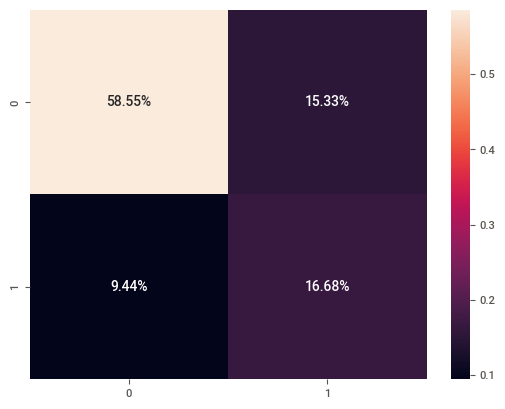

In [126]:
xgb_cm = (confusion_matrix(y_test, xgb_y_pred) / confusion_matrix(y_test, xgb_y_pred).astype(float).sum()) * 100
print("XGBoost Confusion Matrix: \n")
print(sns.heatmap(xgb_cm/nm.sum(xgb_cm), annot = True, fmt = ".2%"))

In [127]:
print("XGBoost \nClassification Report: \n", classification_report(y_test, xgb_y_pred))

XGBoost 
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      1041
           1       0.52      0.64      0.57       368

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



## Tune (hyperparameter tuning) only the Random Forest and XGBoost Models

### Random Forests (RF)

In [128]:
rf1 = RandomForestClassifier(n_estimators = 300, max_leaf_nodes = 10)
rf1.fit(X_train, y_train)
rf1_y_pred = rf1.predict(X_test)

In [129]:
print("Feature Importance of Random Forest Classifier with Parameters: \n")
for name, score in zip(telco2, rf1.feature_importances_):
    print(name, score)

Feature Importance of Random Forest Classifier with Parameters: 

customerID 0.0012926555563505602
gender 0.2580661332258603
SeniorCitizen 0.461634859402645
Partner 0.18899825273717452
Dependents 0.09000809907796974


In [130]:
print("Random Forest \nConfusion Matrix: \n", confusion_matrix(y_test, rf1_y_pred))

Random Forest 
Confusion Matrix: 
 [[715 326]
 [ 79 289]]


Tuned Random Forest Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


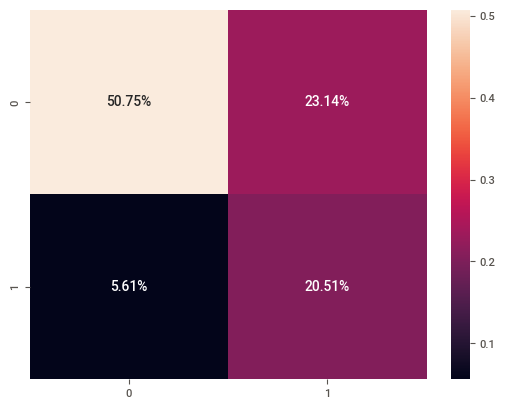

In [131]:
rf1_cm = (confusion_matrix(y_test, rf1_y_pred) / confusion_matrix(y_test, rf1_y_pred).astype(float).sum()) * 100
print("Tuned Random Forest Confusion Matrix: \n")
print(sns.heatmap(rf1_cm/nm.sum(rf1_cm), annot = True, fmt = ".2%"))

In [132]:
print("Random Forest \nClassification Matrix: \n", classification_report(y_test, rf1_y_pred))

Random Forest 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      1041
           1       0.47      0.79      0.59       368

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.71      0.73      1409



### XGBoost (XGB)

In [133]:
xgb1 = XGBClassifier(n_estimators = 300, max_leaf_nodes = 10)
xgb1.fit(X_train, y_train)
xgb1_y_pred = xgb1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:36:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [134]:
print("Feature Importance of XGBoost Classifier with Parameters: \n")
for name, score in zip(telco2, xgb1.feature_importances_):
    print(name, score)

Feature Importance of XGBoost Classifier with Parameters: 

customerID 0.04247378
gender 0.076041415
SeniorCitizen 0.77785385
Partner 0.061684176
Dependents 0.04194676


In [135]:
print("XGBoost \nConfusion Matrix: \n", confusion_matrix(y_test, xgb1_y_pred))

XGBoost 
Confusion Matrix: 
 [[846 195]
 [151 217]]


Tuned XGBoost Confusion Matrix: 

Axes(0.125,0.11;0.62x0.77)


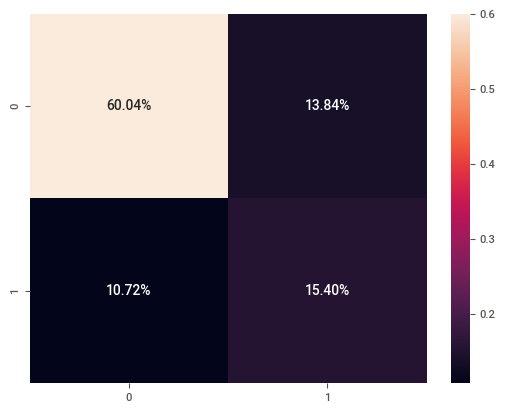

In [136]:
xgb1_cm = (confusion_matrix(y_test, xgb1_y_pred) / confusion_matrix(y_test, xgb1_y_pred).astype(float).sum()) * 100
print("Tuned XGBoost Confusion Matrix: \n")
print(sns.heatmap(xgb1_cm/nm.sum(xgb1_cm), annot = True, fmt = ".2%"))

In [137]:
print("XGBoost \nClassification Matrix: \n", classification_report(y_test, xgb1_y_pred))

XGBoost 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1041
           1       0.53      0.59      0.56       368

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409



### Algorithm selection & model evaluation

In [138]:
classifiers = {"Naïve Bayes": GaussianNB(),
              "Logistic Regression": LogisticRegression(),
              "Random Forest": RandomForestClassifier(),
              "XGBoost": XGBClassifier()}

In [139]:
comparison = pd.DataFrame(columns = ["Classifier", "y", "Accuracy", "Precision", "Recall", "F1-Score"])

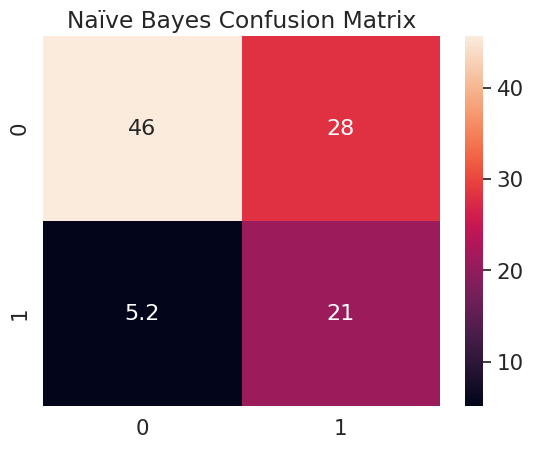

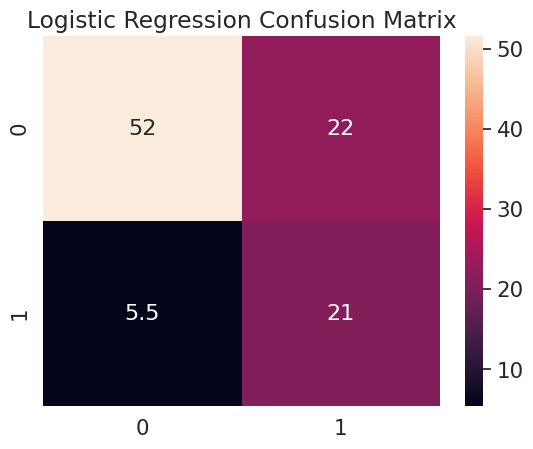

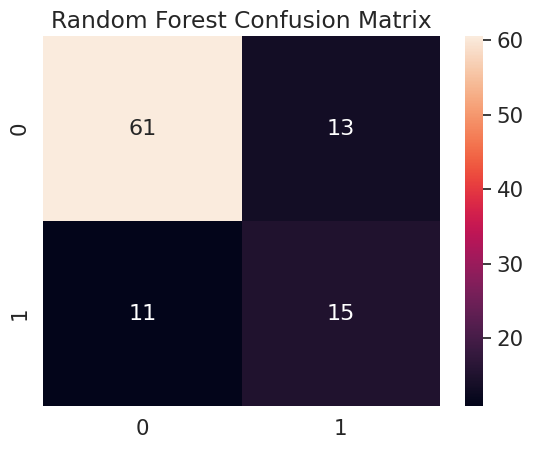

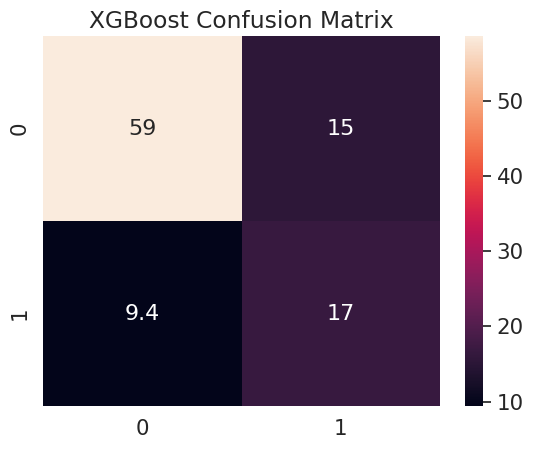

In [140]:
for classifier in classifiers.keys():
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)
    cm = (confusion_matrix(y_test, y_pred) / confusion_matrix(y_test, y_pred).astype(float).sum()) * 100
    comparison_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
    sns.set(font_scale = 1.4)
    sns.heatmap(comparison_cm, annot = True, annot_kws = {"size": 16})
    plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
    plt.show()

NB 0.8511960787827109
LR 0.8417580761272955
RF 0.855561282371
XGB 0.8272560578640243
[array([0.84397678, 0.84458969, 0.86502177]), array([0.83817126, 0.82788671, 0.85921626]), array([0.75471698, 0.89034132, 0.92162554]), array([0.70827286, 0.87654321, 0.8969521 ])]


<ipython-input-141-e99e8b3530d6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


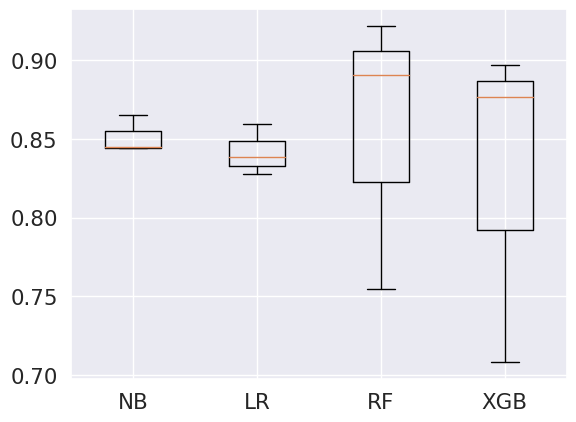

In [141]:
from sklearn.model_selection import cross_val_score

models = []

def classification_Models(X2_train, X2_test, y2_train, y2_test ):

    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)

classification_Models(X_train, X_test, y_train, y_test)